## Observations and Insights 

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = os.path.join("data","Mouse_metadata.csv")
study_results_path = os.path.join("data","Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

In [2]:
# Checking the number of mice in the DataFrame.
num_unique_mice = len(study_complete['Mouse ID'].value_counts())
num_data_points = len(study_complete['Mouse ID'])
print(f'There are {num_unique_mice} unique mice IDs in the DataFrame, across {num_data_points} data points.')

There are 249 unique mice IDs in the DataFrame, across 1893 data points.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
study_complete[study_complete.duplicated(subset=["Mouse ID","Timepoint"] , keep='first')]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Applying inplace to existing DataFrame to save memory.
study_complete.drop_duplicates(subset=["Mouse ID","Timepoint"],keep='first', inplace=True)

In [5]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice2 = len(study_complete['Mouse ID'].value_counts())
num_data_points2 = len(study_complete['Mouse ID'])
print(f'There are {num_unique_mice2} unique mice IDs in the DataFrame, across {num_data_points2} data points.')
print(f'Tidying up duplicates has removed {num_unique_mice2-num_unique_mice} mice and {num_data_points-num_data_points2} datapoints.')

There are 249 unique mice IDs in the DataFrame, across 1888 data points.
Tidying up duplicates has removed 0 mice and 5 datapoints.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method creates multiple series and puts them all together at the end.
drug_list = study_complete['Drug Regimen'].unique()
sum_stats = pd.DataFrame(index = drug_list)
for drug in drug_list:
    sum_stats.loc[drug,"Tumor Volume Mean"] = study_complete.loc[study_complete['Drug Regimen'] == drug]['Tumor Volume (mm3)'].mean()
    sum_stats.loc[drug,"Tumor Volume Median"] = study_complete.loc[study_complete['Drug Regimen'] == drug]['Tumor Volume (mm3)'].median()
    sum_stats.loc[drug,"Tumor Volume Variance"] = study_complete.loc[study_complete['Drug Regimen'] == drug]['Tumor Volume (mm3)'].var()
    sum_stats.loc[drug,"Tumor Volume Standard Deviation"] = study_complete.loc[study_complete['Drug Regimen'] == drug]['Tumor Volume (mm3)'].std()
    sum_stats.loc[drug,"Tumor Volume SEM"] = study_complete.loc[study_complete['Drug Regimen'] == drug]['Tumor Volume (mm3)'].sem()
pd.options.display.float_format = '{:,.2f}'.format
sum_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.39,50.91,43.14,6.57,0.53
Naftisol,54.33,52.51,66.17,8.13,0.60


In [7]:
#Same thing, using Groupby
grouped_drugs_df = study_complete.groupby(['Drug Regimen'])
sum_stats_grouped = pd.DataFrame({'Tumor Volume Mean': grouped_drugs_df['Tumor Volume (mm3)'].mean(),
                                  'Tumor Volume Median': grouped_drugs_df['Tumor Volume (mm3)'].median(),
                                  'Tumor Volume Variance': grouped_drugs_df['Tumor Volume (mm3)'].var(),
                                  'Tumor Volume Standard Deviation': grouped_drugs_df['Tumor Volume (mm3)'].std(),
                                  'Tumor Volume SEM': grouped_drugs_df['Tumor Volume (mm3)'].sem()
},index = drug_list)
sum_stats_grouped

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.39,50.91,43.14,6.57,0.53
Naftisol,54.33,52.51,66.17,8.13,0.60


## Bar Plots

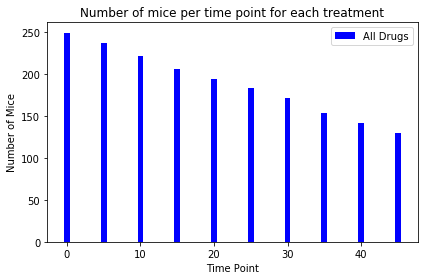

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#First, let's look at a graph for all drugs combined, and show how the number of mice drops over time.
grouped_timepoint_df = study_complete.groupby(['Timepoint'])
mice_per_timepoint = grouped_timepoint_df['Mouse ID'].count()
y_axis = mice_per_timepoint
x_axis = study_complete['Timepoint'].unique()
plt.bar(x_axis, y_axis, color="b", align="center", label= 'All Drugs')
plt.title("Number of mice per time point for each treatment")
plt.xlabel('Time Point')
plt.ylabel('Number of Mice')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

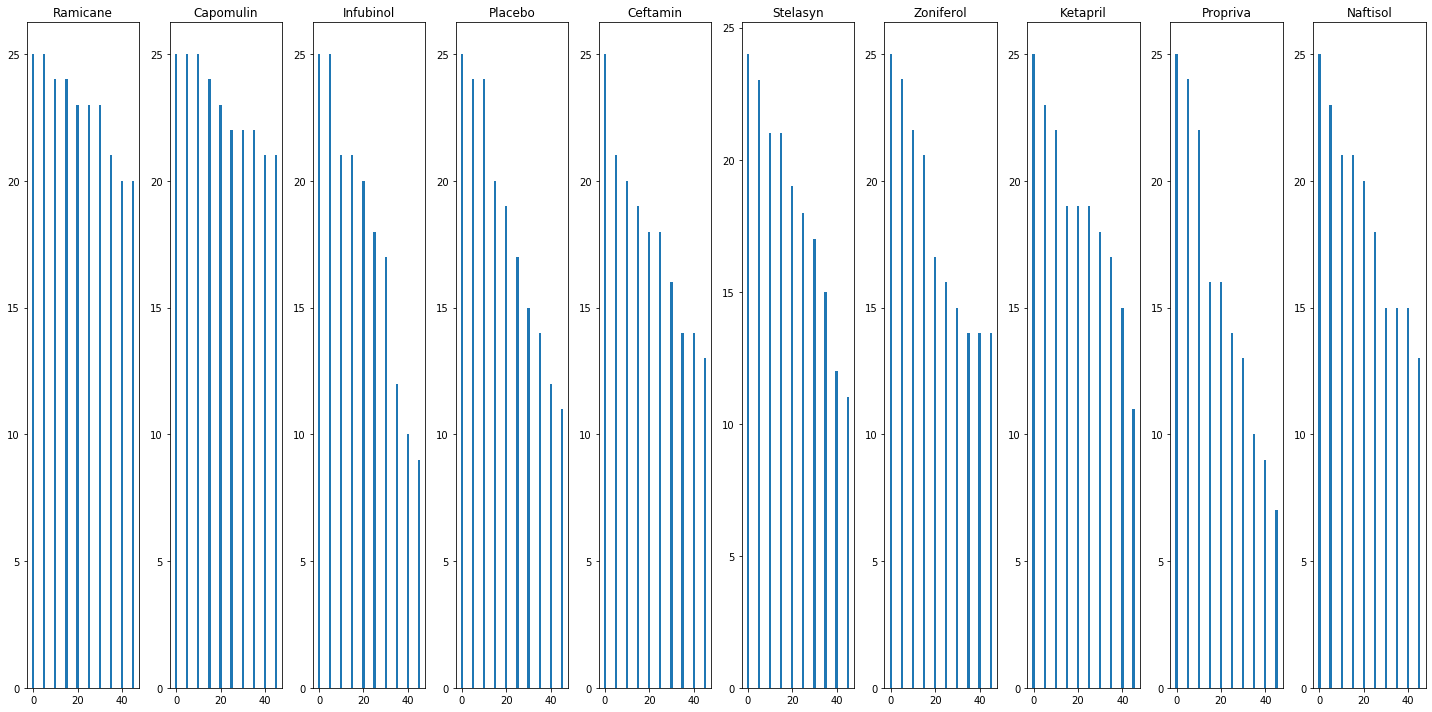

In [24]:
#Now, let's look at the same pattern for individual drugs.
x_axis = study_complete['Timepoint'].unique() 
z = 0
fig, axes = plt.subplots(1, 10)
for drug in drug_list:
    y_axis = study_complete[study_complete['Drug Regimen'] == drug].groupby('Timepoint')['Mouse ID'].count()
    axes[z].bar(x_axis, y_axis,align="center", label= drug, width = 1)
    axes[z].set_title(drug)
    z = z+1
fig.set_size_inches(20, 10, forward=True)
fig.tight_layout()
plt.show()


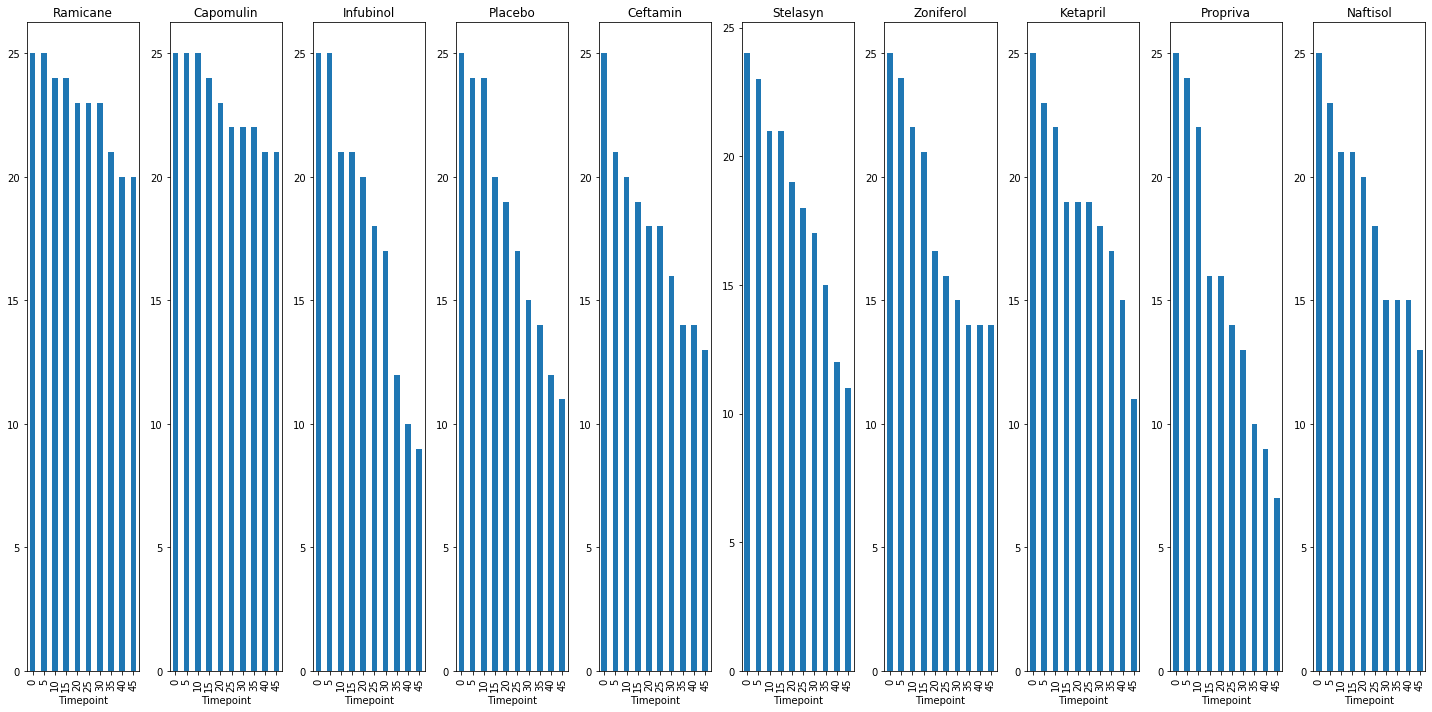

In [20]:
#Same thing, using pandas
pandas_df = study_complete.groupby(["Drug Regimen", "Timepoint"])
pandas_df = pandas_df['Mouse ID'].count()
z=0
fig, axes = plt.subplots(1, 10)
for drug in drug_list:
        p_df= pandas_df[drug]
        p_df.plot(ax=axes[z],kind="bar", label= drug)
        axes[z].set_title(drug)
        z = z+1
fig.set_size_inches(20, 10, forward=True)
fig.tight_layout()
plt.show()

## Pie Plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
